## Data visualisation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv('Iris.csv')

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


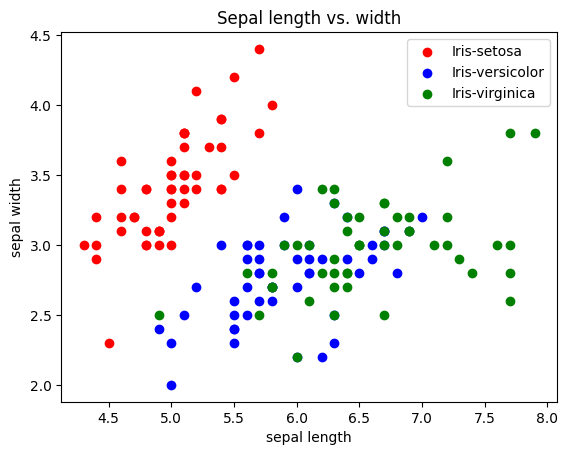

In [7]:
print(iris['Species'].unique())
colour = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

for key, group in iris.groupby(by = 'Species'):
  plt.scatter(group['SepalLengthCm'], group['SepalWidthCm'],
              c = colour[key], label=key)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal length vs. width')
plt.show()

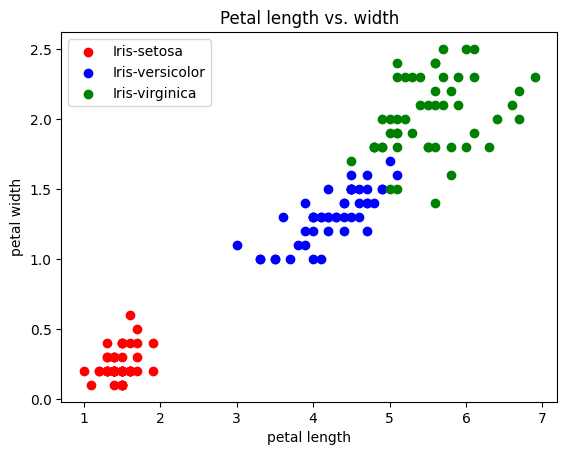

In [50]:
for key, group in iris.groupby(by = 'Species'):
  plt.scatter(group['PetalLengthCm'], group['PetalWidthCm'],
              c = colour[key], label=key)
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal length vs. width')
plt.show()

## Pipeline for KNN

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = iris.drop(columns = ['Species', 'Id'])
le = LabelEncoder()
y = le.fit_transform(iris['Species'])
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, y_train.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(105, 4) (105,)


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
    ])

#Grid Search

param_grid={
        'classifier__n_neighbors': range(1,20,1),
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': range(1,10,1),
        'classifier__metric': ['minkowski', 'euclidean', 'manhattan']
}

search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)
search.best_params_

{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 9,
 'classifier__p': 2,
 'classifier__weights': 'distance'}

In [102]:
from sklearn.metrics import classification_report

best_estimator = search.best_estimator_

y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Pipeline for Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

pipeL = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
    ])

#Grid Search
LogisticRegression()
param_gridL={
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'classifier__fit_intercept': [False, True],
        'classifier__C': range(1,20,1)
}

searchL = GridSearchCV(pipeL, param_gridL)

searchL.fit(X_train, y_train)

print(searchL.best_score_, searchL.best_params_)

y_predL = searchL.best_estimator_.predict(X_test)
print(classification_report(y_test, y_predL))

0.9619047619047618 {'classifier__C': 16, 'classifier__fit_intercept': True, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

